# Séries temporais

Estudo do comportamento de uma variável contínua ao longo do tempo. O intervalo de coleta de dados é regular, e esse resultado não pode ser modificado **nunca**

Série temporal trata uma mesma variável associada ao tempo. Não é possível coletar mais de uma amostra por intervalo

É dependente da ordem no tempo (ex: dados de janeiro devem ser coletados apenas em janeiro)

A série assume uma dependência entre os intervalos (autocorrelação)

Normalmente não se busca causa e efeito em séries temporais. Normalmente se faz previsões apenas

## Classificação

1. Estocásticas: compostas em sua maioria por aleatoriedade. A grande parte dos casos é estocástica
2. Determinísticas: podem ser expressas por meio de funções

## Componentes

Valores observados:
- Tendência
- Sazonalidade
- Aleatoriedade

Normalmente se decompoe a série nessas 3 componentes. Há uma outra componente independente do tempo:

- Ciclo: Um fator atemporal que modifica a série (ex: crise econômica, problema climático)

> Ciclo $\neq$ Sazonalidade

/tmp/ipykernel_17562/1260023369.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


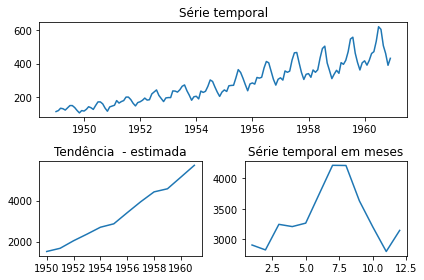

In [34]:
#Série temporal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('datasets/airpassengers.csv')

# Esse método foi deprecated
parse_date = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#deve ter outro jeito de fazer sem ter q ler o csv novamente
df = pd.read_csv('datasets/airpassengers.csv', index_col='Month',
                  parse_dates=['Month'], date_parser=parse_date)

# Converter o dataframe para time series é melhor nesse caso, ainda não sei o pq

ts = df['#Passengers']

#Dá pra acessar oos bagulho diretamente
ts[1]
ts[datetime(1949,2,1)]
ts[1:3]
ts[:'1950-01']

ts_years = ts.resample('A').sum()
ts_months = ts.groupby([lambda x: x.month]).sum()

plt.subplot(2,1,1)
plt.plot(ts)
plt.title('Série temporal')

plt.subplot(2, 2, 3)
plt.plot(ts_years)
plt.title('Tendência  - estimada')

plt.subplot(2, 2, 4)
plt.plot(ts_months)
plt.title('Série temporal em meses')

plt.tight_layout()
plt.show()

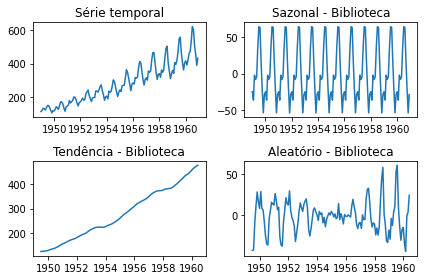

In [24]:
# Decomposição
decompose = seasonal_decompose(ts)
trend = decompose.trend
seasonal = decompose.seasonal
random = decompose.resid

plt.subplot(2, 2, 1)
plt.plot(ts)
plt.title('Série temporal')

plt.subplot(2, 2, 2)
plt.plot(seasonal)
plt.title('Sazonal - Biblioteca')

plt.subplot(2, 2, 3)
plt.plot(trend)
plt.title('Tendência - Biblioteca')

plt.subplot(2, 2, 4)
plt.plot(random)
plt.title('Aleatório - Biblioteca')

plt.tight_layout()
plt.show()


In [ ]:
# Previsões
